In [ ]:
#to continue
#https://www.kaggle.com/imakash3011/customer-analysis-eda-report-clustering   -- notebook
#https://www.kaggle.com/imakash3011/customer-personality-analysis             -- data


#Infos
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
#https://plotly.com/python/bar-charts/                                        --bar charts
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\elbakkali\Desktop\Datasets_Machine_Learning\marketing_campaign.csv', sep='\t')

In [4]:
df2 = df.copy()

In [5]:
pd.set_option('display.max_rows', 29)
pd.set_option('display.max_columns', 29)

In [6]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [7]:
df.shape

(2240, 29)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
df.nunique()
# Z_CostContact and Z_Revenue to drop because only one observation

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [10]:
df.isna().sum()  #df.isna().any() to see if any null values

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [11]:
df.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

# corrélation 

<AxesSubplot:>

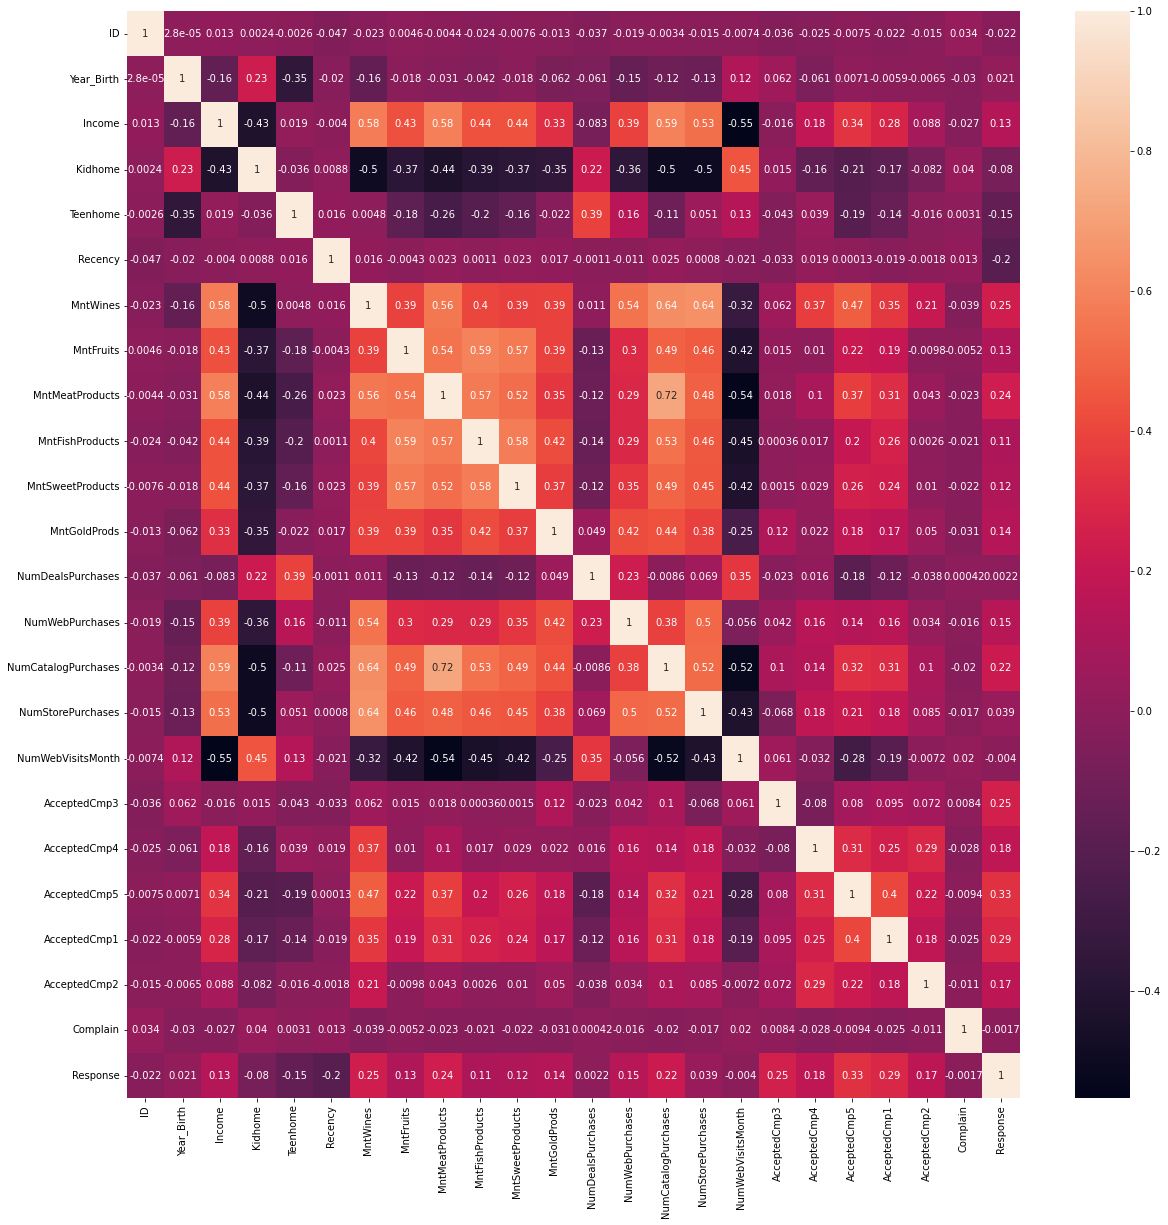

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

In [13]:
corr1 = df.corr()
c1 = corr1.abs().unstack()
c1.sort_values(ascending=False)[24:50:1]

MntMeatProducts      NumCatalogPurchases    0.723827
NumCatalogPurchases  MntMeatProducts        0.723827
NumStorePurchases    MntWines               0.642100
MntWines             NumStorePurchases      0.642100
NumCatalogPurchases  MntWines               0.635226
MntWines             NumCatalogPurchases    0.635226
MntFruits            MntFishProducts        0.594804
MntFishProducts      MntFruits              0.594804
Income               NumCatalogPurchases    0.589162
NumCatalogPurchases  Income                 0.589162
Income               MntMeatProducts        0.584633
MntMeatProducts      Income                 0.584633
MntFishProducts      MntSweetProducts       0.579870
MntSweetProducts     MntFishProducts        0.579870
Income               MntWines               0.578650
MntWines             Income                 0.578650
MntFishProducts      MntMeatProducts        0.568402
MntMeatProducts      MntFishProducts        0.568402
MntSweetProducts     MntFruits              0.

<Figure size 1440x1440 with 0 Axes>

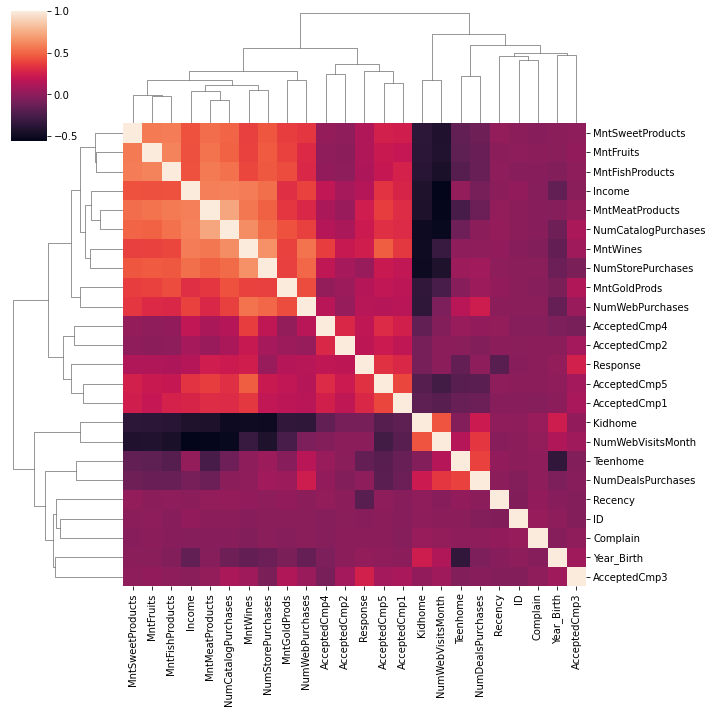

In [14]:
plt.figure(figsize=(20,20))
sns.clustermap(df.corr())

# Preprocessing

In [15]:
df['Income'] = df['Income'].fillna(df['Income'].mean())
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
dtype: bool

In [16]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0             0         0         1  
1             0             0             0             0         0         0  
2             0             0             0             0         0         0  
3             0             0             0             0         0         0  
4             0             0             0             0         0         0

In [17]:
df['Marital_Status'].value_counts() #after the replace

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [18]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'], 'relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow','Alone','Absurd','YOLO'], 'Single')

In [19]:
# Combining some columns into one column to reduce number of dimensions to reduce model complexity
df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Expenses'] = df['MntFishProducts'] + df['MntFruits'] + df['MntGoldProds']+ df['MntMeatProducts']+ df['MntSweetProducts']+ df['MntWines']
df['NumPurchases'] = df['NumCatalogPurchases']+df['NumDealsPurchases']+df['NumStorePurchases']+df['NumWebPurchases']
df['TotalAcceptedCampaings']= df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']

In [20]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation   relationship  71613.0        0         0   
3  6182        1984  Graduation   relationship  26646.0        1         0   
4  5324        1981         PhD   relationship  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  ...  NumCatalogPurchases  NumStorePurchases  \
0                88  ...                   10                  4   
1                 1  ...                    1                  2   
2                21  ...                    2                 10   
3                 3  ...                    0                  4   
4                27  ...                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  Kids  Expenses  NumPurchases  \
0             0         0         1     0      1617            25   
1             0         0         0     2        27             6   
2             0         0         0     0       776            21   
3             0         0         0     1        53             8   
4             0         0         0     1       422            19   

   TotalAcceptedCampaings  
0                       1  
1                       0  
2                       0  
3                       0  
4                       0  

[5 rows x 31 columns]

In [21]:
col_drop= ['Kidhome', 'Teenhome', 'MntFishProducts', 'MntFruits', 'MntGoldProds', 'MntMeatProducts', 'MntSweetProducts', 'MntWines',
          'NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases','NumWebPurchases', 'AcceptedCmp1','AcceptedCmp2',
          'AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']
df.drop(columns=col_drop, axis=1, inplace=True)

In [22]:
df.head()

ID  Year_Birth   Education Marital_Status   Income Dt_Customer  Recency  \
0  5524        1957  Graduation         Single  58138.0  04-09-2012       58   
1  2174        1954  Graduation         Single  46344.0  08-03-2014       38   
2  4141        1965  Graduation   relationship  71613.0  21-08-2013       26   
3  6182        1984  Graduation   relationship  26646.0  10-02-2014       26   
4  5324        1981         PhD   relationship  58293.0  19-01-2014       94   

   NumWebVisitsMonth  Complain  Kids  Expenses  NumPurchases  \
0                  7         0     0      1617            25   
1                  5         0     2        27             6   
2                  4         0     0       776            21   
3                  6         0     1        53             8   
4                  5         0     1       422            19   

   TotalAcceptedCampaings  
0                       1  
1                       0  
2                       0  
3                       0  
4                       0

In [23]:
# Age
df['Age'] = (2021 - df['Year_Birth']) 

In [24]:
df.head()

ID  Year_Birth   Education Marital_Status   Income Dt_Customer  Recency  \
0  5524        1957  Graduation         Single  58138.0  04-09-2012       58   
1  2174        1954  Graduation         Single  46344.0  08-03-2014       38   
2  4141        1965  Graduation   relationship  71613.0  21-08-2013       26   
3  6182        1984  Graduation   relationship  26646.0  10-02-2014       26   
4  5324        1981         PhD   relationship  58293.0  19-01-2014       94   

   NumWebVisitsMonth  Complain  Kids  Expenses  NumPurchases  \
0                  7         0     0      1617            25   
1                  5         0     2        27             6   
2                  4         0     0       776            21   
3                  6         0     1        53             8   
4                  5         0     1       422            19   

   TotalAcceptedCampaings  Age  
0                       1   64  
1                       0   67  
2                       0   56  
3                       0   37  
4                       0   40

In [25]:
df.drop('Year_Birth', axis=1, inplace=True)

In [26]:
df.head()

ID   Education Marital_Status   Income Dt_Customer  Recency  \
0  5524  Graduation         Single  58138.0  04-09-2012       58   
1  2174  Graduation         Single  46344.0  08-03-2014       38   
2  4141  Graduation   relationship  71613.0  21-08-2013       26   
3  6182  Graduation   relationship  26646.0  10-02-2014       26   
4  5324         PhD   relationship  58293.0  19-01-2014       94   

   NumWebVisitsMonth  Complain  Kids  Expenses  NumPurchases  \
0                  7         0     0      1617            25   
1                  5         0     2        27             6   
2                  4         0     0       776            21   
3                  6         0     1        53             8   
4                  5         0     1       422            19   

   TotalAcceptedCampaings  Age  
0                       1   64  
1                       0   67  
2                       0   56  
3                       0   37  
4                       0   40

In [27]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [28]:
df['Education'] = df['Education'].replace(['Graduation','PhD','Master','2n Cycle'], 'High')
df['Education'] = df['Education'].replace(['Basic'], 'basic')

In [29]:
df['Education'].value_counts()

High     2186
basic      54
Name: Education, dtype: int64

In [30]:
# Number of days a customer was engaged with company

# Changing Dt_customer into timestamp format

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Now_day'] = '21-10-2021'
df['Now_day'] = pd.to_datetime(df['Now_day'])
df['day_engaged'] = (df['Now_day'] - df['Dt_Customer']).dt.days

In [31]:
df.head()

ID Education Marital_Status   Income Dt_Customer  Recency  \
0  5524      High         Single  58138.0  2012-04-09       58   
1  2174      High         Single  46344.0  2014-08-03       38   
2  4141      High   relationship  71613.0  2013-08-21       26   
3  6182      High   relationship  26646.0  2014-10-02       26   
4  5324      High   relationship  58293.0  2014-01-19       94   

   NumWebVisitsMonth  Complain  Kids  Expenses  NumPurchases  \
0                  7         0     0      1617            25   
1                  5         0     2        27             6   
2                  4         0     0       776            21   
3                  6         0     1        53             8   
4                  5         0     1       422            19   

   TotalAcceptedCampaings  Age    Now_day  day_engaged  
0                       1   64 2021-10-21         3482  
1                       0   67 2021-10-21         2636  
2                       0   56 2021-10-21         2983  
3                       0   37 2021-10-21         2576  
4                       0   40 2021-10-21         2832

In [32]:
df.drop(['ID', 'Dt_Customer', 'Now_day', 'Recency', 'Complain'], axis=1, inplace=True)

In [33]:
df.head()

Education Marital_Status   Income  NumWebVisitsMonth  Kids  Expenses  \
0      High         Single  58138.0                  7     0      1617   
1      High         Single  46344.0                  5     2        27   
2      High   relationship  71613.0                  4     0       776   
3      High   relationship  26646.0                  6     1        53   
4      High   relationship  58293.0                  5     1       422   

   NumPurchases  TotalAcceptedCampaings  Age  day_engaged  
0            25                       1   64         3482  
1             6                       0   67         2636  
2            21                       0   56         2983  
3             8                       0   37         2576  
4            19                       0   40         2832

# Graphs

In [34]:
import plotly.express as px

In [35]:
import plotly.graph_objects as go

In [36]:
fig = px.bar(df, x='Marital_Status', y='Expenses', color='Education')
fig.show()

In [37]:
fig = px.bar(df, x='Marital_Status', y='Expenses', color='Marital_Status', title='Expenses by marital status')
fig.show()

In [38]:
fig = px.histogram(df, x='Expenses', facet_row='Marital_Status')
fig.show()

In [39]:
fig = px.histogram(df, x='Expenses', facet_row='Education', template='plotly_dark')
fig.show()

In [40]:
fig = px.histogram(df, x='NumPurchases', facet_row='Education', template='plotly_dark')
fig.show()

In [41]:
fig = px.histogram(df, x='Age', facet_row='Marital_Status', template='plotly_dark')
fig.show()

In [42]:
fig = px.histogram(df, x='Income', facet_row='Marital_Status', template='plotly_dark')
fig.show()

In [42]:
fig = px.pie(df, names='Marital_Status', hole=0.4)
fig.show()

In [43]:
fig = px.pie(df, names='Education', hole=0.4)
fig.show()

Text(0.5, 1.0, 'Expenses by education')

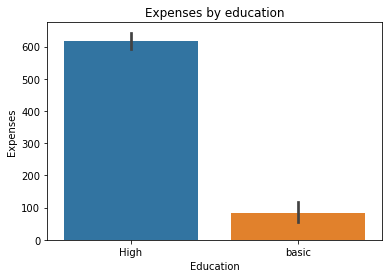

In [44]:
plt.figure()
sns.barplot(x='Education',y='Expenses', data=df)
plt.title('Expenses by education')

Text(0.5, 1.0, 'Expenses by education')

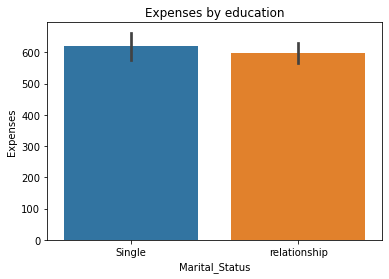

In [45]:
plt.figure()
sns.barplot(x='Marital_Status',y='Expenses', data=df)
plt.title('Expenses by education')

In [46]:
df.describe()

Income  NumWebVisitsMonth         Kids     Expenses  \
count    2240.000000        2240.000000  2240.000000  2240.000000   
mean    52247.251354           5.316518     0.950446   605.798214   
std     25037.797168           2.426645     0.751803   602.249288   
min      1730.000000           0.000000     0.000000     5.000000   
25%     35538.750000           3.000000     0.000000    68.750000   
50%     51741.500000           6.000000     1.000000   396.000000   
75%     68289.750000           7.000000     1.000000  1045.500000   
max    666666.000000          20.000000     3.000000  2525.000000   

       NumPurchases  TotalAcceptedCampaings          Age  day_engaged  
count   2240.000000             2240.000000  2240.000000  2240.000000  
mean      14.862054                0.446875    52.194196  3023.043304  
std        7.677173                0.890543    11.984069   232.229893  
min        0.000000                0.000000    25.000000  2511.000000  
25%        8.000000                0.000000    44.000000  2851.750000  
50%       15.000000                0.000000    51.000000  3024.000000  
75%       21.000000                1.000000    62.000000  3196.250000  
max       44.000000                5.000000   128.000000  3574.000000

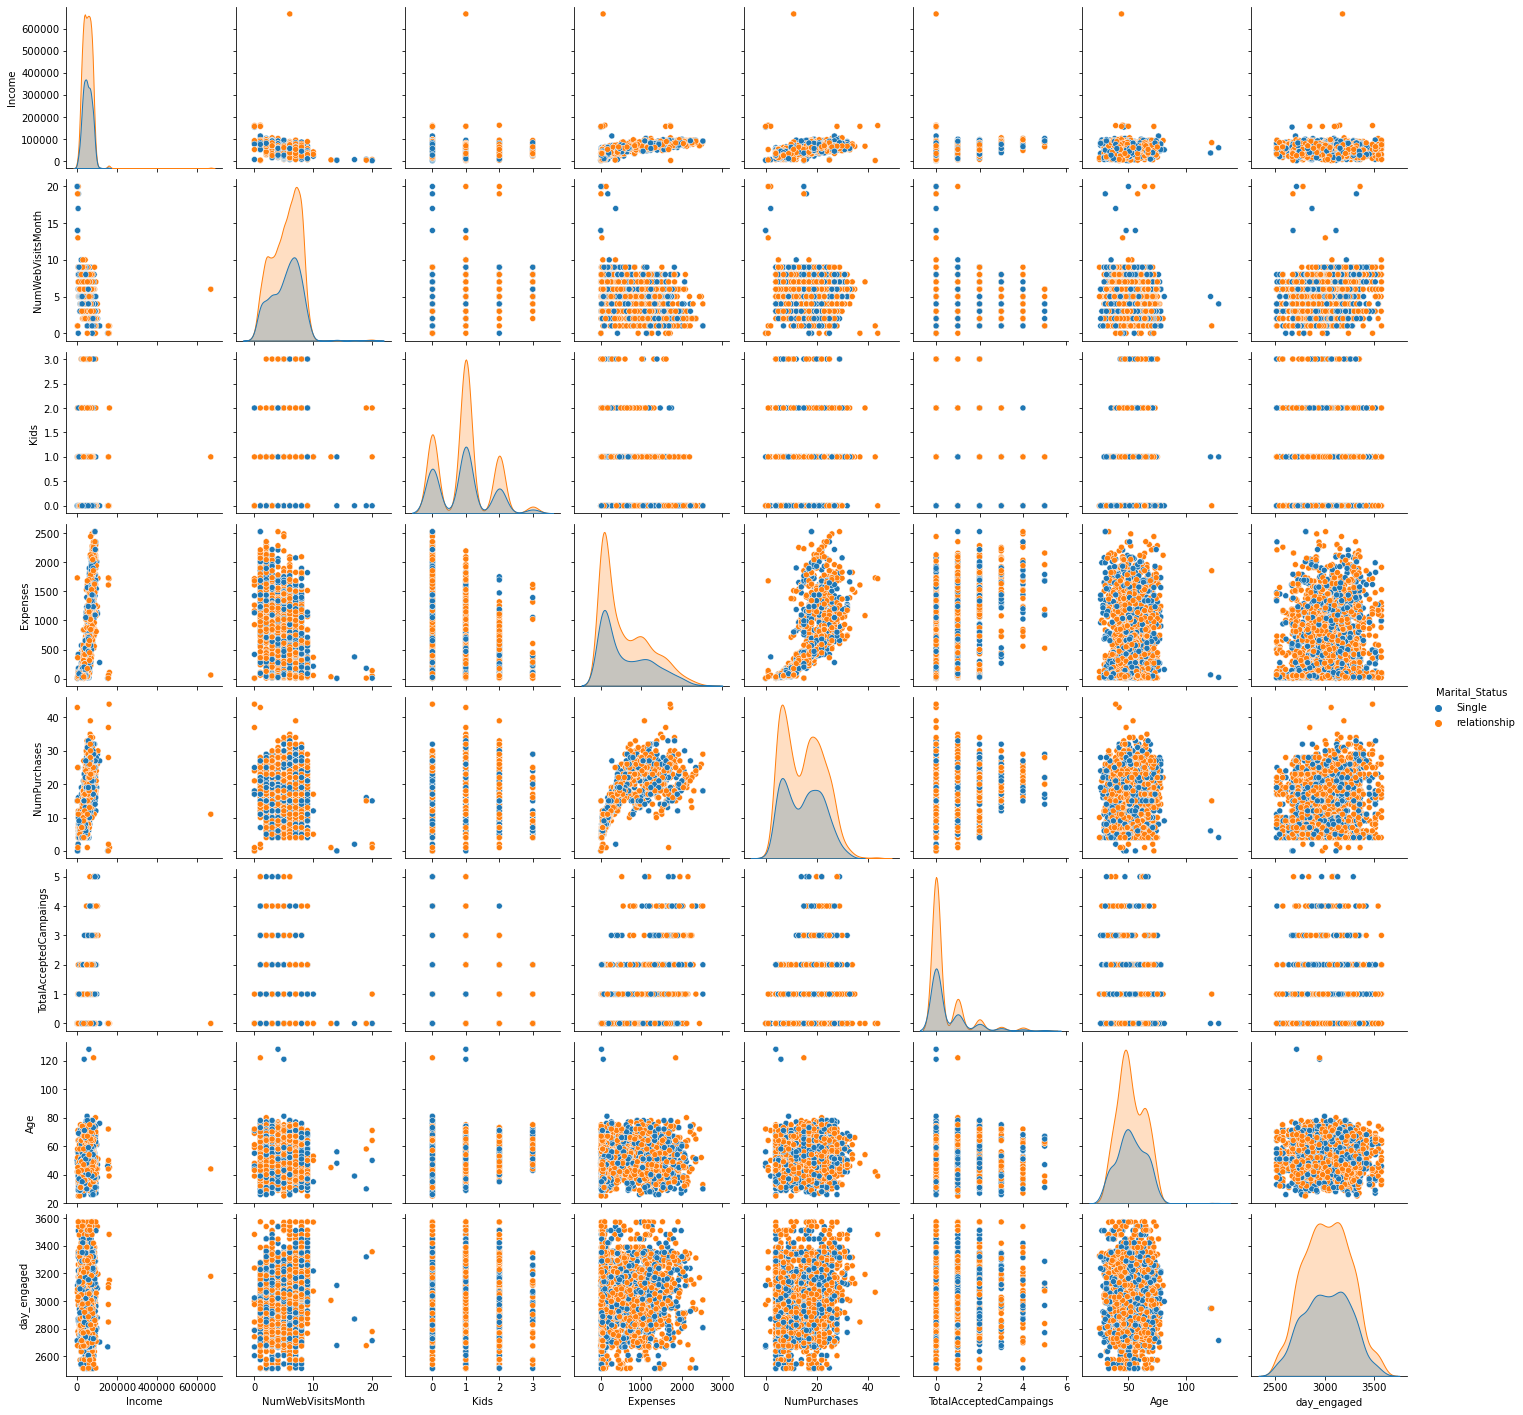

In [47]:
sns.pairplot(df, hue='Marital_Status')

<AxesSubplot:>

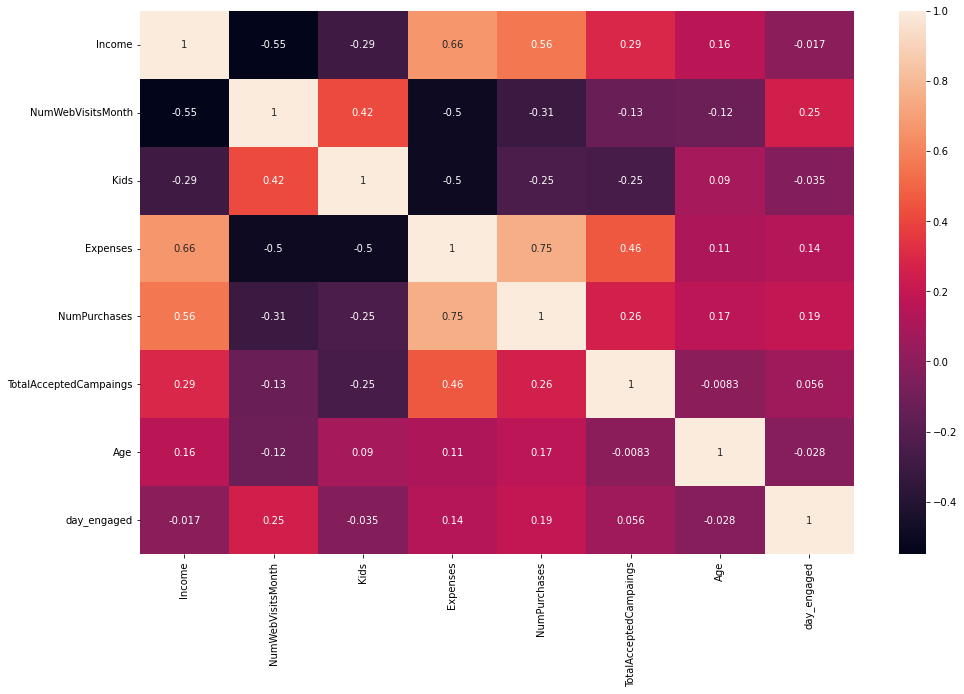

In [48]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)

In [49]:
categorical_columns = df.select_dtypes(object).columns

In [50]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [51]:
#encoding 

l_encoder = LabelEncoder()
for i in categorical_columns:
    df[i] = df[[i]].apply(l_encoder.fit_transform)

In [52]:
df['Marital_Status']

0       0
1       0
2       1
3       1
4       1
       ..
2235    1
2236    1
2237    0
2238    1
2239    1
Name: Marital_Status, Length: 2240, dtype: int32

In [53]:
df_labelencoded = df.copy()

# Méthode de scalling à retenir

In [54]:
# scalling

scaled_ft = StandardScaler().fit_transform(df_labelencoded)
df_encoded_scaled = pd.DataFrame(scaled_ft, index= df_labelencoded.index, columns=df_labelencoded.columns)

In [55]:
df_encoded_scaled.head()

Education  Marital_Status    Income  NumWebVisitsMonth      Kids  Expenses  \
0  -0.157171       -1.346874  0.235327           0.693904 -1.264505  1.679417   
1  -0.157171       -1.346874 -0.235826          -0.130463  1.396361 -0.961275   
2  -0.157171        0.742460  0.773633          -0.542647 -1.264505  0.282673   
3  -0.157171        0.742460 -1.022732           0.281720  0.065928 -0.918094   
4  -0.157171        0.742460  0.241519          -0.130463  0.065928 -0.305254   

   NumPurchases  TotalAcceptedCampaings       Age  day_engaged  
0      1.320826                0.621248  0.985345     1.976745  
1     -1.154596               -0.501912  1.235733    -1.667011  
2      0.799685               -0.501912  0.317643    -0.172468  
3     -0.894025               -0.501912 -1.268149    -1.925433  
4      0.539114               -0.501912 -1.017761    -0.822831

# Elbow method

In [56]:
from sklearn.cluster import KMeans

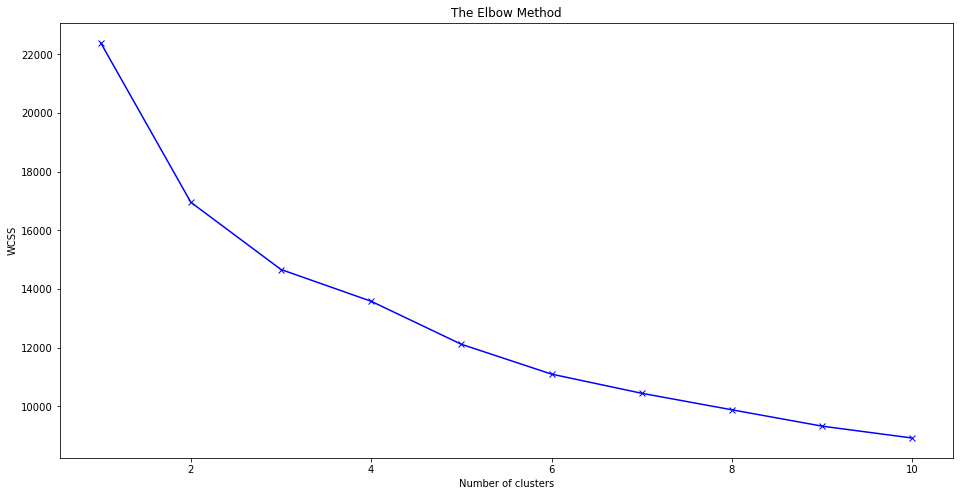

In [57]:
wcss=[]
for i in range (1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(df_encoded_scaled)
    wcss.append(kmeans.inertia_)  #l'inertie
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
    

## As it is not clear from the elbow method which value of K to choose 

### >> silhouette_score

In [58]:
from sklearn.metrics import silhouette_score

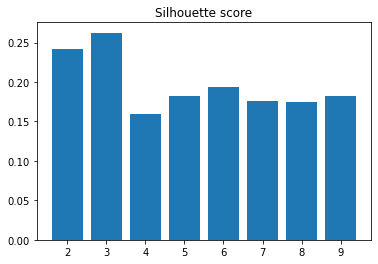

In [59]:
silhouette_sc = []
for i in range(2,10):
    model = KMeans(n_clusters=i, random_state=0)
    c = model.fit_transform(df_encoded_scaled)
    silhouette_sc.append(silhouette_score(df_encoded_scaled, model.fit_predict(df_encoded_scaled)))
plt.figure()
plt.bar(range(2,10), silhouette_sc)
plt.title('Silhouette score')
plt.show()

In [60]:
silhouette_sc

[0.24149273850199005,
 0.2624165149942829,
 0.15912667243999665,
 0.1818544909301824,
 0.19348335615762316,
 0.17569250632926914,
 0.17482174010721932,
 0.18162968956153125]

# Model building

In [62]:
# Training model using best K, 3 in this case

kmeans = KMeans(n_clusters=3, random_state=0).fit(df_encoded_scaled)
pred = kmeans.predict(df_encoded_scaled)

# Appending these clusters to the main df
df['cluster'] = pred + 1

<AxesSubplot:xlabel='cluster', ylabel='count'>

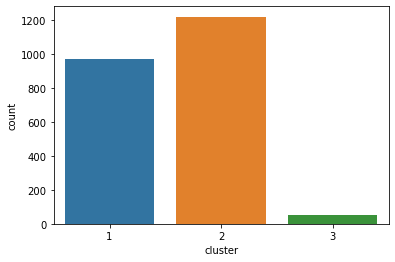

In [70]:
sns.countplot(x=df['cluster'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

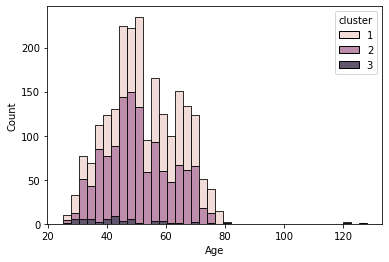

In [77]:
sns.histplot(data=df, x='Age', hue='cluster', multiple='stack')

In [80]:
fig = px.histogram(data_frame=df, x='Age', facet_row='cluster')
fig.show()

C:\Users\ELBAKK~1\AppData\Local\Temp/ipykernel_2472/2896013644.py:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 432x288 with 0 Axes>

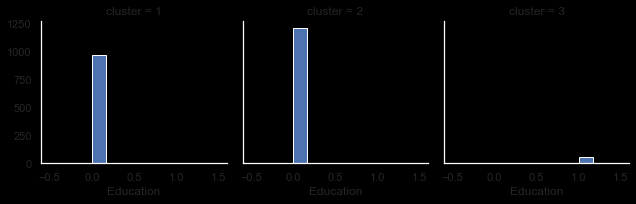

<Figure size 432x288 with 0 Axes>

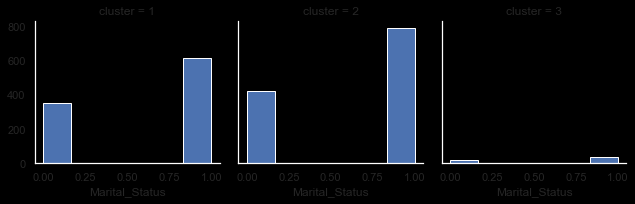

<Figure size 432x288 with 0 Axes>

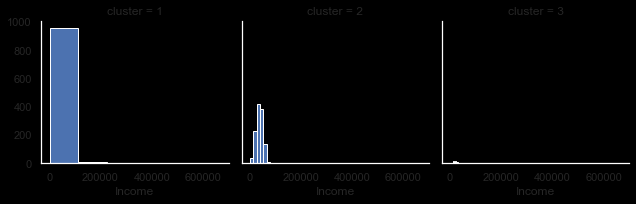

<Figure size 432x288 with 0 Axes>

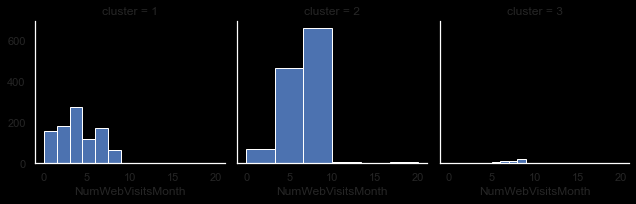

<Figure size 432x288 with 0 Axes>

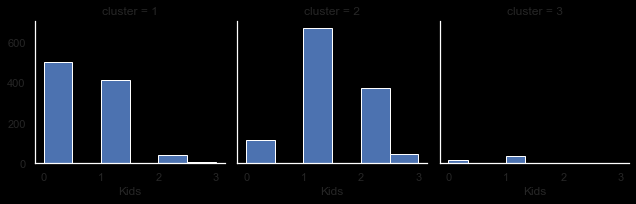

<Figure size 432x288 with 0 Axes>

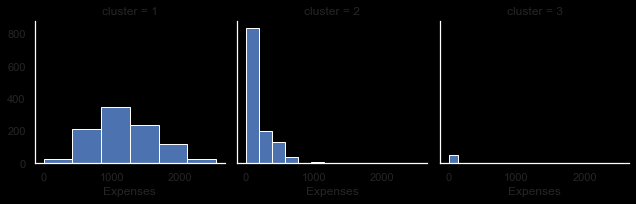

<Figure size 432x288 with 0 Axes>

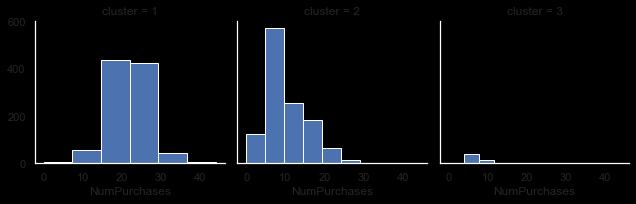

<Figure size 432x288 with 0 Axes>

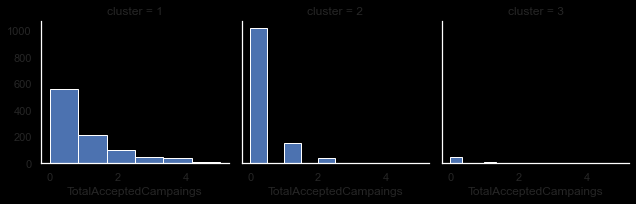

<Figure size 432x288 with 0 Axes>

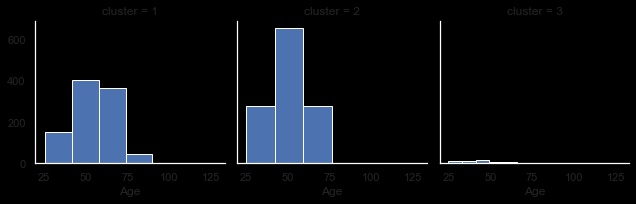

<Figure size 432x288 with 0 Axes>

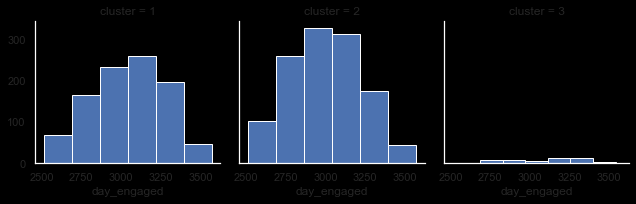

<Figure size 432x288 with 0 Axes>

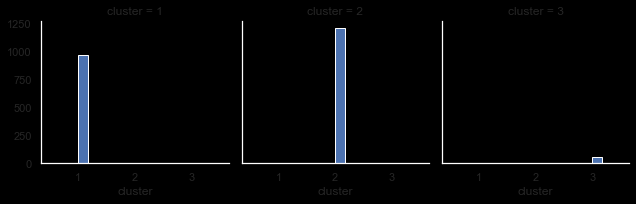

In [92]:
for i in df.columns:
    plt.figure()
    g = sns.FacetGrid(df, col="cluster")
    g.map_dataframe(plt.hist, x=i, bins=6)

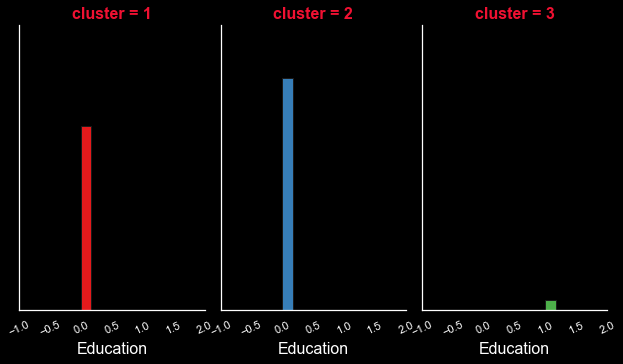

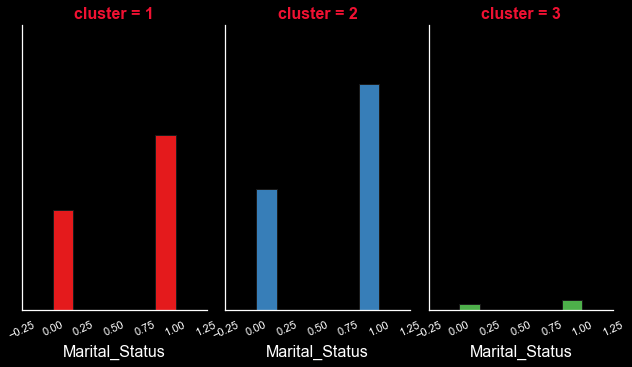

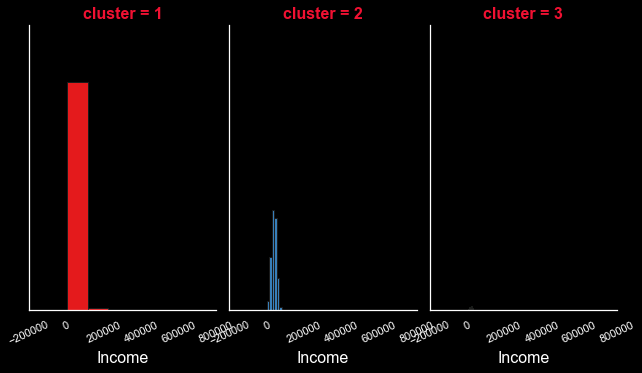

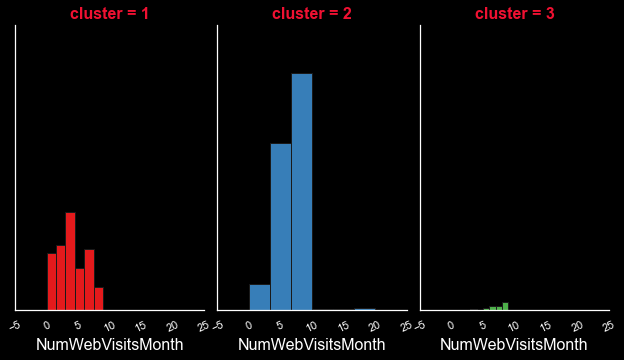

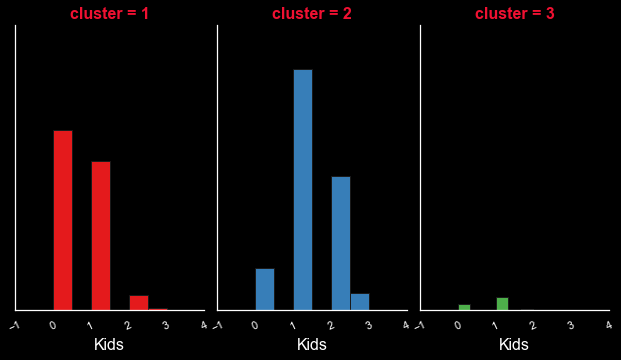

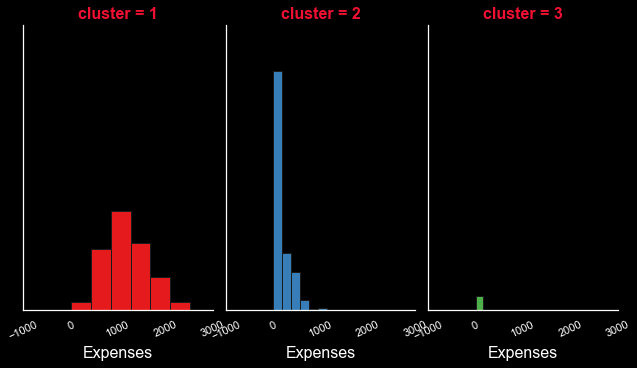

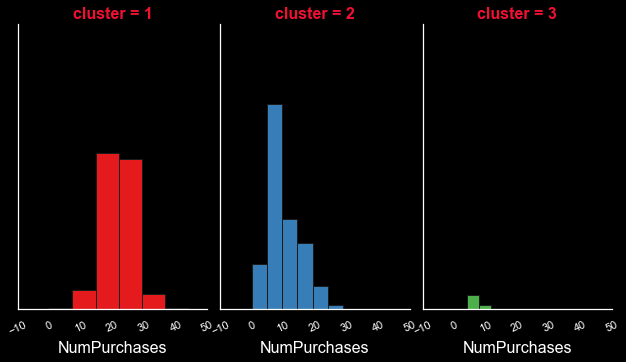

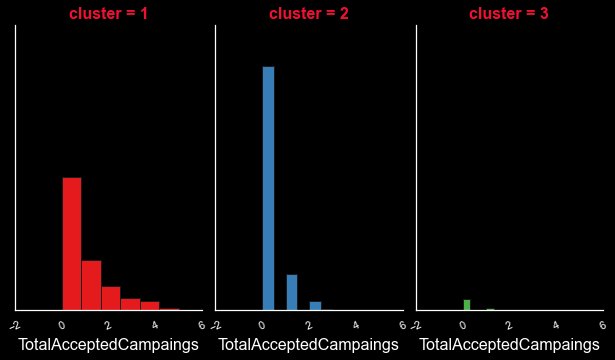

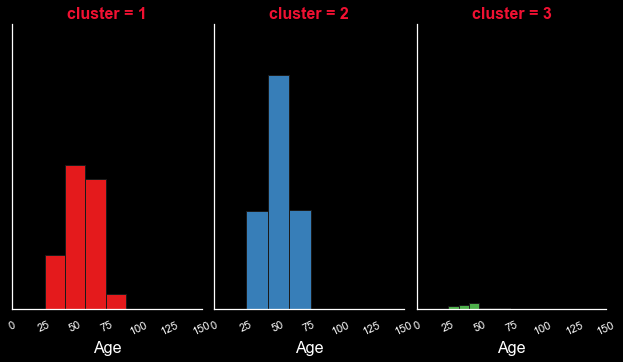

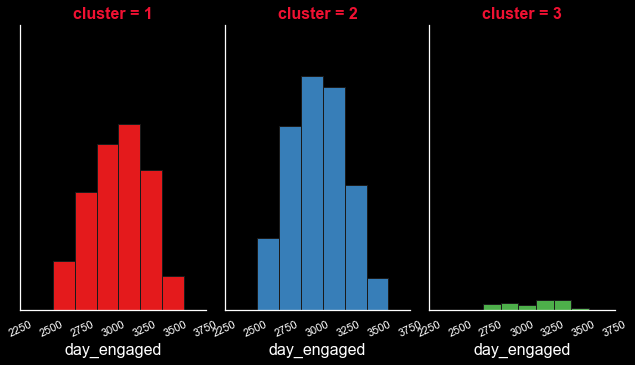

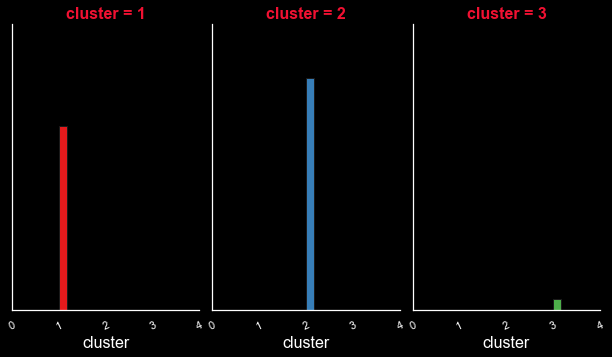

In [91]:
# Clusters interpretation 
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})

for i in df:
    diag = sns.FacetGrid(df, col = "cluster", hue = "cluster", palette = "Set1")
    diag.map(plt.hist, i, bins=6, ec="k") 
    diag.set_xticklabels(rotation=25, color = 'white')
    diag.set_yticklabels(color = 'white')
    diag.set_xlabels(size=16, color = 'white')
    diag.set_titles(size=16, color = '#f01132', fontweight="bold")
    diag.fig.set_figheight(6)